### About Dataset
Dataset consists of different laptops from a low budget, low end laptop to high budget, high end laptops and there spesifications listed their. 

Specification consists of following components:-
- CPU
- GPU
- RAM
- Storage
- Touch Screen
- Screen Dimentions
- Laptop Brand
- Total Price of Laptop

This dataset will help people get an idea of there budget and the specs of laptop they are buying.

Dataset : https://www.kaggle.com/datasets/juanmerinobermejo/laptops-price-dataset/data

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('laptops.csv', encoding='latin1')
data

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [5]:
data.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [6]:
data.nunique()

Laptop          2160
Status             2
Brand             27
Model            121
CPU               28
RAM                9
Storage           12
Storage type       2
GPU               44
Screen            29
Touch              2
Final Price     1440
dtype: int64

In [7]:
data.drop(columns=['Model'], inplace=True)

In [8]:
mask = data['CPU'].str.startswith(('Intel', 'AMD', 'Apple'))
data = data[mask]

In [9]:
data['Screen'].fillna(data['Screen'].mode()[0], inplace=True)

In [10]:
data['CPU_brand'] = data['CPU'].str.split().str[0]

In [11]:
laptops = data['Laptop']
data.drop(columns=['Laptop'], inplace=True)

In [12]:
counts = data['Brand'].value_counts()
data = data[data['Brand'].isin(counts[counts >= 25].index)]

data = data[data['Final Price'] < 5000]

In [13]:
data['GPU'].fillna('NO_GPU', inplace=True)

In [14]:
data1 = data.copy()
data

,Status,Brand,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price,CPU_brand
0,New,Asus,Intel Core i5,8,512,SSD,NO_GPU,15.6,No,1009.00,Intel
1,New,Alurin,Intel Celeron,8,256,SSD,NO_GPU,15.6,No,299.00,Intel
2,New,Asus,Intel Core i3,8,256,SSD,NO_GPU,15.6,No,789.00,Intel
3,New,MSI,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00,Intel
4,New,HP,Intel Core i5,16,512,SSD,NO_GPU,15.6,No,669.01,Intel
...,...,...,...,...,...,...,...,...,...,...,...
2155,Refurbished,Razer,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99,Intel
2156,Refurbished,Razer,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99,Intel
2157,Refurbished,Razer,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99,Intel
2158,Refurbished,Razer,Intel Evo Core i7,16,1000,SSD,NO_GPU,13.4,Yes,1899.99,Intel


<Axes: xlabel='count', ylabel='Brand'>

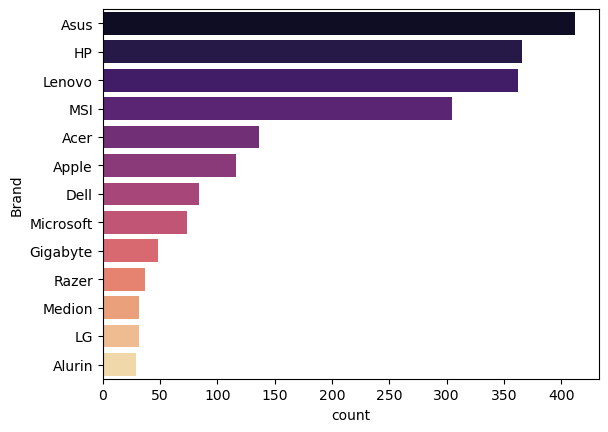

In [13]:
sns.countplot(data['Brand'], order=data['Brand'].value_counts().index, palette='magma')

<Axes: xlabel='Final Price', ylabel='CPU'>

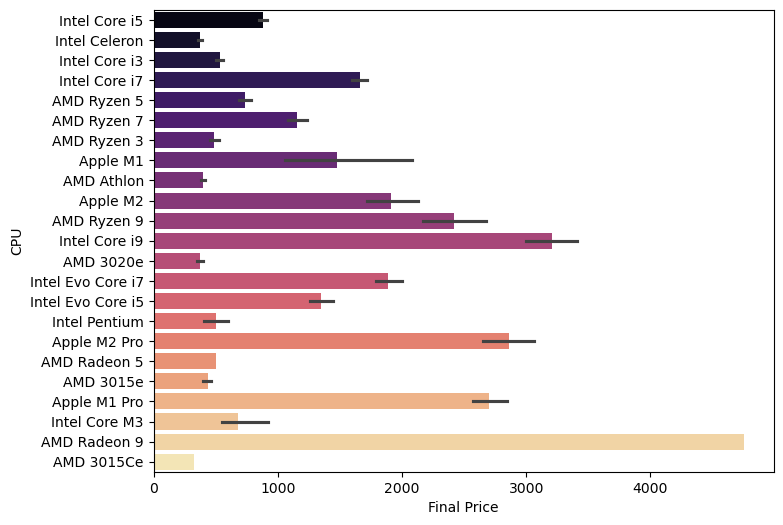

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['Final Price'], y=data['CPU'], palette='magma')

<Axes: xlabel='Final Price', ylabel='GPU'>

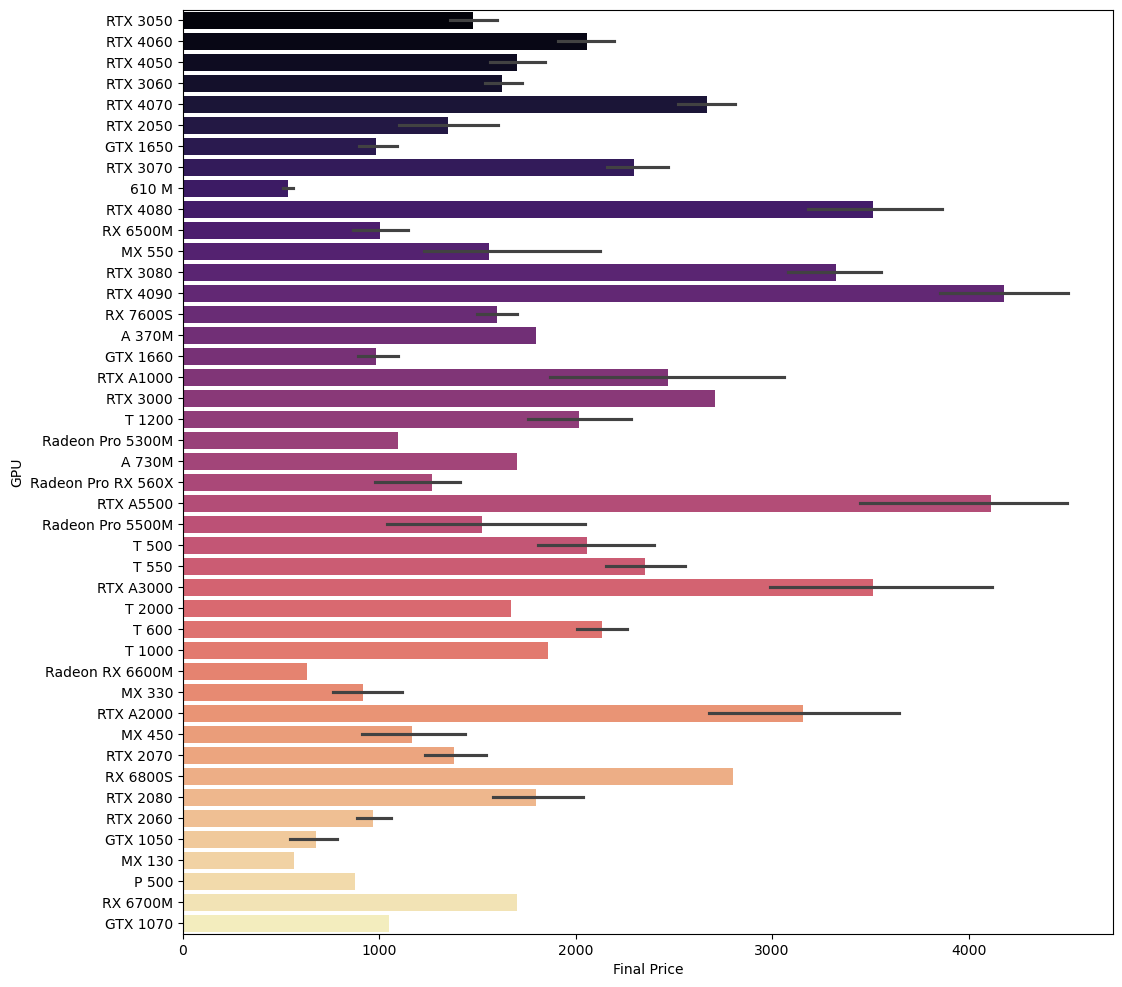

In [15]:
plt.figure(figsize=(12, 12))
sns.barplot(x=data['Final Price'], y=data['GPU'], palette='magma')

<Axes: xlabel='RAM', ylabel='Final Price'>

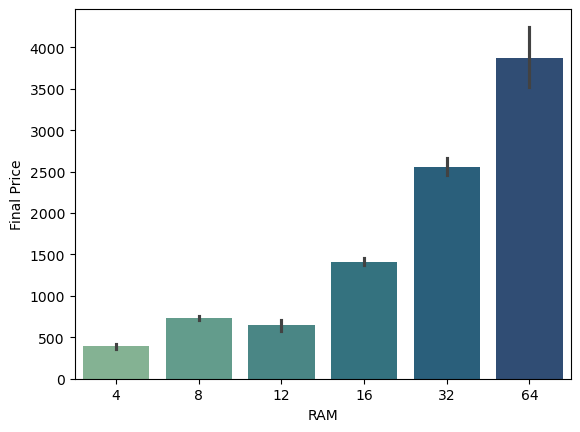

In [16]:
sns.barplot(x=data['RAM'], y=data['Final Price'], palette='crest')

<Axes: >

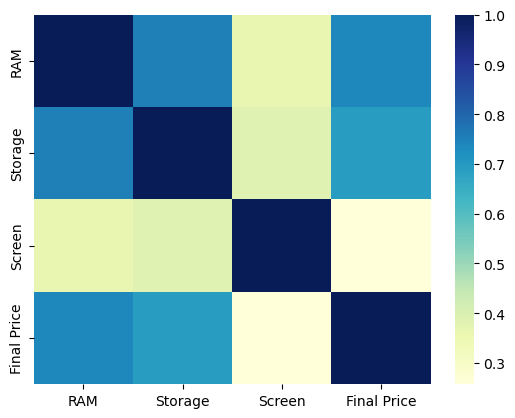

In [17]:
sns.heatmap(data.corr(numeric_only=True), cmap="YlGnBu")

<Axes: xlabel='Status', ylabel='count'>

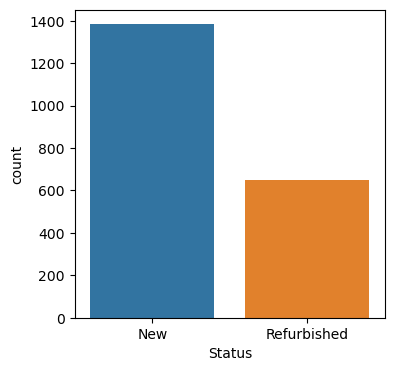

In [18]:
plt.figure(figsize=(4, 4))
sns.countplot(x=data['Status'], palette='tab10')

<Axes: xlabel='Touch', ylabel='Final Price'>

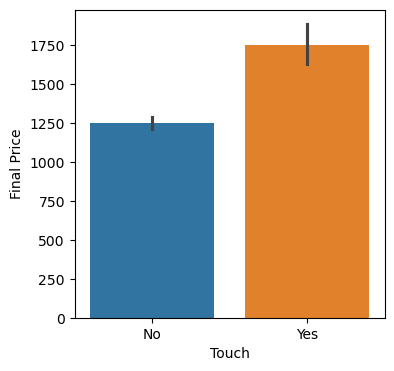

In [19]:
plt.figure(figsize=(4, 4))
sns.barplot(x=data['Touch'], y=data['Final Price'], palette='tab10')

<Axes: xlabel='Final Price', ylabel='Density'>

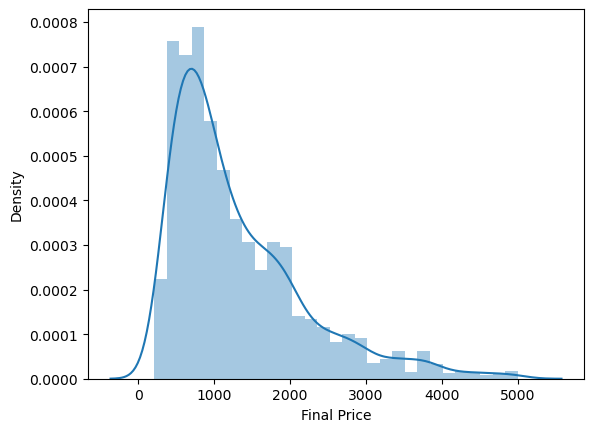

In [20]:
sns.distplot(data['Final Price'])

<Axes: xlabel='Final Price'>

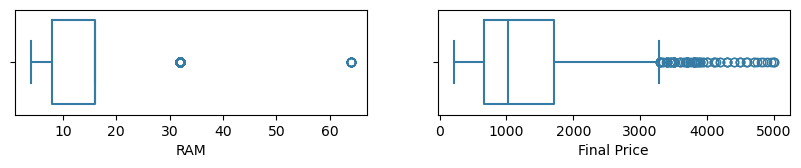

In [21]:
plt.figure(figsize=(10,3))
plt.subplot(2,2,1)
sns.boxplot(data['RAM'] , orient='h', palette='mako', fill=False)

plt.subplot(2,2,2)
sns.boxplot(data['Final Price'] , orient='h', palette='mako', fill=False)

In [15]:
data.CPU.unique()

array(['Intel Core i5', 'Intel Celeron', 'Intel Core i3', 'Intel Core i7',
       'AMD Ryzen 5', 'AMD Ryzen 7', 'AMD Ryzen 3', 'Apple M1',
       'AMD Athlon', 'Apple M2', 'AMD Ryzen 9', 'Intel Core i9',
       'AMD 3020e', 'Intel Evo Core i7', 'Intel Evo Core i5',
       'Intel Pentium', 'Apple M2 Pro', 'AMD Radeon 5', 'AMD 3015e',
       'Apple M1 Pro', 'Intel Core M3', 'AMD Radeon 9', 'AMD 3015Ce'],
      dtype=object)

In [16]:
# data['Evo_model'] = False
# data['Pro_model'] = False
# data['Radeon_model'] = False
# data['Ryzen_model'] = False
# data['CPU_model'] = ""


# for index, cpu in data.iterrows():
#     cpu_name = cpu['CPU']
#     cpu_split = cpu_name.split()
    
#     if cpu_split[0] == 'Intel':
#         if cpu_split[1] == 'Evo':
#             data.at[index, 'CPU_model'] = cpu_split[-1]
#             data.at[index, 'Evo_model'] = True
#         elif cpu_split[1] == 'Core':
#             data.at[index, 'CPU_model'] = cpu_split[-1]
#         elif cpu_split[-1] in ['Celeron', 'M3', 'Pentium']:
#             data.at[index, 'CPU_model'] = cpu_split[-1]
            
#     elif cpu_split[0] == 'AMD':
#         if cpu_split[1] == 'Radeon':
#             data.at[index, 'CPU_model'] = cpu_split[-1]
#             data.at[index, 'Radeon_model'] = True
#         elif cpu_split[1] == 'Ryzen':
#             data.at[index, 'CPU_model'] = cpu_split[-1]
#             data.at[index, 'Ryzen_model'] = True
#         elif cpu_split[-1] in ['3015Ce', '3015e', '3020e', 'Athlon']:
#             data.at[index, 'CPU_model'] = cpu_split[-1]
            
#     elif cpu_split[0] == 'Apple':
#         if cpu_split[-1] == 'Pro':
#             data.at[index, 'Pro_model'] = True
#         data.at[index, 'CPU_model'] = cpu_split[1]        

# data.drop(columns=['CPU'], inplace=True)       

def preprocess_cpu(data):
    data['Evo_model'] = False
    data['Pro_model'] = False
    data['Radeon_model'] = False
    data['Ryzen_model'] = False
    data['CPU_model'] = ""

    for index, cpu in data.iterrows():
        cpu_name = cpu['CPU']
        cpu_split = cpu_name.split()

        if cpu_split[0] == 'Intel':
            if cpu_split[1] == 'Evo':
                data.at[index, 'CPU_model'] = cpu_split[-1]
                data.at[index, 'Evo_model'] = True
            elif cpu_split[1] == 'Core':
                data.at[index, 'CPU_model'] = cpu_split[-1]
            elif cpu_split[-1] in ['Celeron', 'M3', 'Pentium']:
                data.at[index, 'CPU_model'] = cpu_split[-1]

        elif cpu_split[0] == 'AMD':
            if cpu_split[1] == 'Radeon':
                data.at[index, 'CPU_model'] = cpu_split[-1]
                data.at[index, 'Radeon_model'] = True
            elif cpu_split[1] == 'Ryzen':
                data.at[index, 'CPU_model'] = cpu_split[-1]
                data.at[index, 'Ryzen_model'] = True
            elif cpu_split[-1] in ['3015Ce', '3015e', '3020e', 'Athlon']:
                data.at[index, 'CPU_model'] = cpu_split[-1]

        elif cpu_split[0] == 'Apple':
            if cpu_split[-1] == 'Pro':
                data.at[index, 'Pro_model'] = True
            data.at[index, 'CPU_model'] = cpu_split[1]

    data.drop(columns=['CPU'], inplace=True)
    return data



In [17]:
data.GPU.unique()

array(['NO_GPU', 'RTX 3050', 'RTX 4060', 'RTX 4050', 'RTX 3060',
       'RTX 4070', 'RTX 2050', 'GTX 1650', 'RTX 3070', '610 M',
       'RTX 4080', 'RX 6500M', 'MX 550', 'RTX 3080', 'RTX 4090',
       'RX 7600S', 'A 370M', 'GTX 1660', 'RTX A1000', 'RTX 3000',
       'T 1200', 'Radeon Pro 5300M', 'A 730M', 'Radeon Pro RX 560X',
       'RTX A5500', 'Radeon Pro 5500M', 'T 500', 'T 550', 'RTX A3000',
       'T 2000', 'T 600', 'T 1000', 'Radeon RX 6600M', 'MX 330',
       'RTX A2000', 'MX 450', 'RTX 2070', 'RX 6800S', 'RTX 2080',
       'RTX 2060', 'GTX 1050', 'MX 130', 'P 500', 'RX 6700M', 'GTX 1070'],
      dtype=object)

In [18]:
# data['RTX_model'] = False
# data['GTX_model'] = False
# data['MX_model'] = False
# data['RX_model'] = False
# data['T_model'] = False
# data['A_model'] = False
# data['Radeon_model'] = False

# data['GPU_model'] = ""




# for index, gpu in data.iterrows():
    
#     gpu_name = gpu['GPU']
#     gpu_split = gpu_name.split()
    
#     if gpu_split[0] == 'RTX':
#         data.at[index, 'GPU_model'] = gpu_split[-1]
#         data.at[index, 'RTX_model'] = True
        
#     elif cpu_split[0] == 'GTX':
#         data.at[index, 'GPU_model'] = gpu_split[-1]
#         data.at[index, 'GTX_model'] = True
            
#     elif cpu_split[0] == 'MX':
#         data.at[index, 'GPU_model'] = gpu_split[-1]
#         data.at[index, 'MX_model'] = True
        
#     elif cpu_split[0] == 'RX':
#         data.at[index, 'GPU_model'] = gpu_split[-1]
#         data.at[index, 'RX_model'] = True
        
#     elif cpu_split[0] == 'T':
#         data.at[index, 'GPU_model'] = gpu_split[-1]
#         data.at[index, 'T_model'] = True
        
#     elif cpu_split[0] == 'A':
#         data.at[index, 'GPU_model'] = gpu_split[-1]
#         data.at[index, 'A_model'] = True
    
#     elif cpu_split[0] == 'Radeon':
#         data.at[index, 'GPU_model'] = gpu_split[-1]
#         data.at[index, 'Radeon_model'] = True

         

# data.drop(columns=['GPU'], inplace=True)

def preprocess_gpu(data):
    data['RTX_model'] = False
    data['GTX_model'] = False
    data['MX_model'] = False
    data['RX_model'] = False
    data['T_model'] = False
    data['A_model'] = False
    data['Radeon_model'] = False
    data['GPU_model'] = ""

    for index, gpu in data.iterrows():
        gpu_name = gpu['GPU']
        gpu_split = gpu_name.split()

        if gpu_split[0] == 'RTX':
            data.at[index, 'GPU_model'] = gpu_split[-1]
            data.at[index, 'RTX_model'] = True

        elif gpu_split[0] == 'GTX':
            data.at[index, 'GPU_model'] = gpu_split[-1]
            data.at[index, 'GTX_model'] = True

        elif gpu_split[0] == 'MX':
            data.at[index, 'GPU_model'] = gpu_split[-1]
            data.at[index, 'MX_model'] = True

        elif gpu_split[0] == 'RX':
            data.at[index, 'GPU_model'] = gpu_split[-1]
            data.at[index, 'RX_model'] = True

        elif gpu_split[0] == 'T':
            data.at[index, 'GPU_model'] = gpu_split[-1]
            data.at[index, 'T_model'] = True

        elif gpu_split[0] == 'A':
            data.at[index, 'GPU_model'] = gpu_split[-1]
            data.at[index, 'A_model'] = True

        elif gpu_split[0] == 'Radeon':
            data.at[index, 'GPU_model'] = gpu_split[-1]
            data.at[index, 'Radeon_model'] = True

    data.drop(columns=['GPU'], inplace=True)
    return data

In [19]:
data = preprocess_cpu(data)
data = preprocess_gpu(data)

In [20]:
print(np.unique(data['Status']))

data['Storage type'] = data['Storage type'].astype(str)
print(np.unique(data['Storage type']))

print(np.unique(data['Touch']))

print(np.unique(data['CPU_brand']))
print(np.unique(data['CPU_model']))

print(np.unique(data['Brand']))

print(np.unique(data['GPU_model']))

['New' 'Refurbished']
['SSD' 'eMMC' 'nan']
['No' 'Yes']
['AMD' 'Apple' 'Intel']
['3' '3015Ce' '3015e' '3020e' '5' '7' '9' 'Athlon' 'Celeron' 'M1' 'M2'
 'M3' 'Pentium' 'i3' 'i5' 'i7' 'i9']
['Acer' 'Alurin' 'Apple' 'Asus' 'Dell' 'Gigabyte' 'HP' 'LG' 'Lenovo' 'MSI'
 'Medion' 'Microsoft' 'Razer']
['' '1000' '1050' '1070' '1200' '130' '1650' '1660' '2000' '2050' '2060'
 '2070' '2080' '3000' '3050' '3060' '3070' '3080' '330' '370M' '4050'
 '4060' '4070' '4080' '4090' '450' '500' '5300M' '550' '5500M' '560X'
 '600' '6500M' '6600M' '6700M' '6800S' '730M' '7600S' 'A1000' 'A2000'
 'A3000' 'A5500']


In [21]:
data

,Status,Brand,RAM,Storage,Storage type,Screen,Touch,Final Price,CPU_brand,Evo_model,...,Radeon_model,Ryzen_model,CPU_model,RTX_model,GTX_model,MX_model,RX_model,T_model,A_model,GPU_model
0,New,Asus,8,512,SSD,15.6,No,1009.00,Intel,False,...,False,False,i5,False,False,False,False,False,False,
1,New,Alurin,8,256,SSD,15.6,No,299.00,Intel,False,...,False,False,Celeron,False,False,False,False,False,False,
2,New,Asus,8,256,SSD,15.6,No,789.00,Intel,False,...,False,False,i3,False,False,False,False,False,False,
3,New,MSI,16,1000,SSD,15.6,No,1199.00,Intel,False,...,False,False,i7,True,False,False,False,False,False,3050
4,New,HP,16,512,SSD,15.6,No,669.01,Intel,False,...,False,False,i5,False,False,False,False,False,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Refurbished,Razer,16,1000,SSD,17.3,No,2699.99,Intel,False,...,False,False,i7,True,False,False,False,False,False,3060
2156,Refurbished,Razer,16,1000,SSD,17.3,No,2899.99,Intel,False,...,False,False,i7,True,False,False,False,False,False,3070
2157,Refurbished,Razer,32,1000,SSD,17.3,No,3399.99,Intel,False,...,False,False,i7,True,False,False,False,False,False,3080
2158,Refurbished,Razer,16,1000,SSD,13.4,Yes,1899.99,Intel,True,...,False,False,i7,False,False,False,False,False,False,


In [23]:
# encoder = OneHotEncoder(sparse=False)
col_to_encode = []
for col in data.columns:
    if data[col].dtype == 'object':
        col_to_encode.append(col)


data = pd.get_dummies(data, columns=col_to_encode)

In [24]:
X = data.drop(columns=['Final Price'])
y = np.log(data['Final Price'])

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1)

In [31]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_lr))
print('MAE',mean_absolute_error(y_test,y_pred_lr))

R2 score 0.8045014025634504
MAE 0.21367286543412742


In [32]:
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=25, max_features=16)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_dt))
print('MAE',mean_absolute_error(y_test,y_pred_dt))

R2 score 0.7648807297672223
MAE 0.2188729601313469


In [33]:
ad = AdaBoostRegressor()

ad.fit(X_train, y_train)

y_pred_ad = ad.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_ad))
print('MAE',mean_absolute_error(y_test,y_pred_ad))

R2 score 0.6971511623292629
MAE 0.28024077923898383


In [34]:
gb = GradientBoostingRegressor(n_estimators=150, max_depth=7)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_gb))
print('MAE',mean_absolute_error(y_test,y_pred_gb))

R2 score 0.8507808204147504
MAE 0.1792650042134965


In [35]:
et = ExtraTreesRegressor(n_estimators=200, max_depth=17)

et.fit(X_train, y_train)

y_pred_et = et.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_et))
print('MAE',mean_absolute_error(y_test,y_pred_et))

R2 score 0.81047693445189
MAE 0.19957400374620274


In [36]:
from xgboost import XGBRegressor

step2 = XGBRegressor()

pipe = Pipeline([
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8448662531832076
MAE 0.18375545760028972


In [37]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.6, 0.8, 1.0],
# }

# xgb_regressor = xgb.XGBRegressor(random_state=7)

# grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_train, y_train)


# print("Best parameters found: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [38]:
xg = XGBRegressor(n_estimators=200, subsample=1, max_depth=3)


xg.fit(X_train,y_train)

y_pred_xg = xg.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_xg))
print('MAE',mean_absolute_error(y_test,y_pred_xg))

R2 score 0.8480808315419525
MAE 0.18218192869982724


In [39]:
# param_grid = {
#     'n_estimators': [100, 150, 200, 250],
#     'max_depth': [10, 15, 18, 20, 25],
#     'max_samples': [0.3, 0.4, 0.8],
#     'max_features': [0.05, 0.08, 0.1]
# }

# rf_regressor = RandomForestRegressor(random_state=7)

# grid_search = GridSearchCV(estimator=rf_regressor,
#                            param_grid=param_grid,
#                            cv=5,
#                            verbose=2,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("Best parameters found: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [26]:
rf = RandomForestRegressor(n_estimators=300,
                              random_state=6,
                              max_samples=.6,
                              max_features=0.08,
                              max_depth=21)

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred_rf))
print('MAE',mean_absolute_error(y_test,y_pred_rf))

R2 score 0.8500343140515466
MAE 0.18406006370622613
